In [51]:
import sympy as sp
import einsteinpy.symbolic as gr
import pandas as pd
sp.init_printing()

In [2]:
t, r, th, ph = sp.symbols('t, r, theta, phi')
u, a, c = sp.symbols('mu, a, c')
rho, D, E = sp.symbols('rho, Delta, Sigma')

n = 4

# Métrica

$$
g_{\mu \nu}
$$

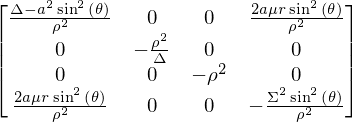

In [3]:
#metric = [[0 for i in range(4)] for i in range(4)]

#metric[0][0] = sp.simplify((D - a**2*(sp.sin(th))**2)/rho**2)
#metric[0][3] = sp.simplify(2*u*a*r*(sp.sin(th))**2/rho**2)
#metric[1][1] = -rho**2/D
#metric[2][2] = -rho**2
#metric[3][0] = sp.simplify(2*u*a*r*(sp.sin(th))**2/rho**2)
#metric[3][3] = sp.simplify(-E**2*(sp.sin(th))**2/rho**2)

#coord = [t, r, th, ph]
#metric_gr = gr.MetricTensor(metric, coord)

#metric_gr.tensor()

$$
\Sigma^2(\Delta - a^2\sin^2 \theta) + 4 a^2 \mu^2 r^2 \sin^2 \theta = \Delta \rho^4
$$

In [77]:
def subsx(exp, extra = False):
    exp = exp.simplify()
    exp = sp.factor(exp)
    exp = exp.subs(r**2 + a**2*sp.cos(th)**2, rho)
    exp = exp.subs(r**2 - 2*u*r + a**2, D)
    exp = exp.subs((r**2 + a**2)**2 - a**2*D*(sp.sin(th))**2, E)
    #exp = exp.subs(E**2*(D - a**2*(sp.sin(th))**2) + 4*a**2*u**2*r**2*(sp.sin(th))**2, D*rho**4)
    exp = exp.subs(D*E**2 - E**2*a**2*(sp.sin(th))**2 + 4*a**2*u**2*r**2*(sp.sin(th))**2, D*rho**4)
    #exp = exp.subs((-E + 2*u*r)*(E + 2*u*r), D*(rho**2 + 2*u*r))
    #exp = exp.subs(2*D*E**2 - E**2*a**2*(sp.sin(th))**2 + 4*a**2*u**2*r**2*(sp.sin(th))**2, D*(rho**4 + E**2))
    #exp = exp.subs(3*D*E**2 - E**2*a**2*(sp.sin(th))**2 + 4*a**2*u**2*r**2*(sp.sin(th))**2, D*(rho**4 + 2*E**2))
    #exp = exp.subs(-2*D*a**2*u**2*(sp.sin(th))**2 - 2*E**2*a**2*(sp.sin(th))**2 + 8*a**2*u**2*r**2*(sp.sin(th))**2, -2*D*a**2*(u**2 + 2*u*r + rho**2)*(sp.sin(th))**2) 
    #exp = exp.subs(-2*D*a**2*u**2*(sp.sin(th))**4 - 2*E**2*a**2*(sp.sin(th))**4 + 8*a**2*u**2*r**2*(sp.sin(th))**4, -2*D*a**2*(u**2 + 2*u*r + rho**2)*(sp.sin(th))**4)
    
    
    return exp

def fracx(exp):
    num, den = sp.fraction(exp)
                
    num = subsx(num)
    den = subsx(den)
                
    exp = num/den
    
    return exp

#def writex(nam, exp):
#    nam = open(nam + '.txt', 'w')
    
#    nam.write(str(i) + str(j) + str(k) + '\n')
#    nam.write(sp.latex(exp) + '\n')
    
#    nam_latex.close()

In [5]:
inv = metric_gr.inv()

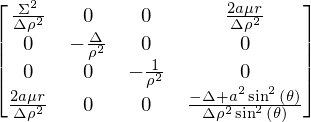

In [6]:
invx = subsx(inv)

invx

# Christoffel

$$
\Gamma^\alpha_{\beta \gamma}
$$

In [7]:
chris = gr.ChristoffelSymbols.from_metric(metric_gr)

In [6]:
chr_latex = open('christoffel_sage.txt', 'w+')

for i in chr_latex:
    print(i)

#for i in range(n):
#    for j in range(n):
#        for k in range(j, n):
#            if chris[i, j, k] != 0:
#                chrxpr = subsx(chris[i, j, k])
                
#                chrxpr = fracx(chrxpr)
                
                
                
#                display([i, j, k], chrxpr)
                
#chr_latex.close()

# Riemann

$$
R^\alpha_{\beta \gamma \delta}
$$

In [20]:
rim = gr.RiemannCurvatureTensor.from_metric(metric_gr)

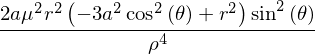

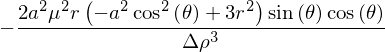

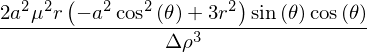

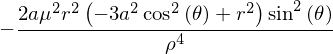

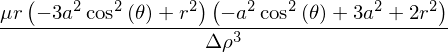

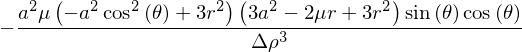

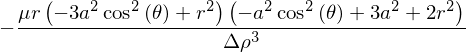

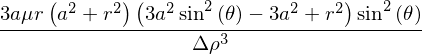

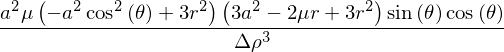

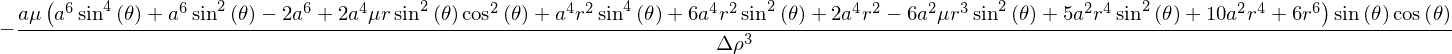

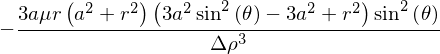

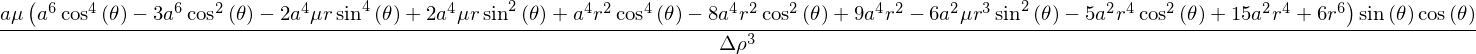

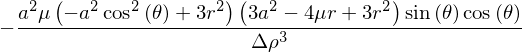

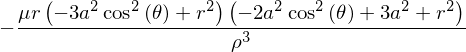

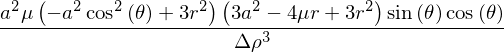

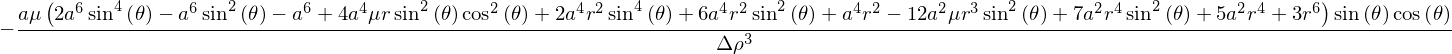

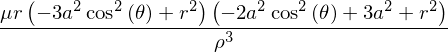

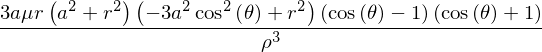

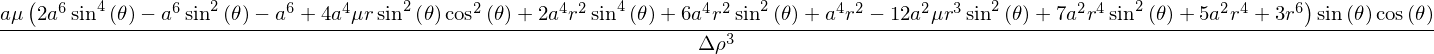

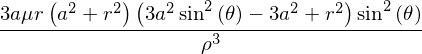

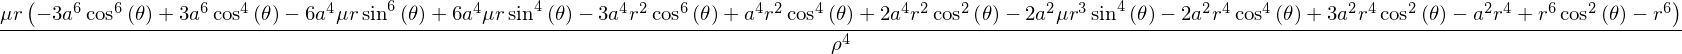

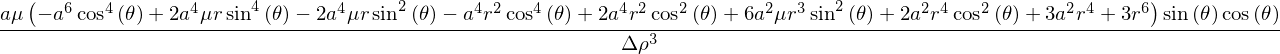

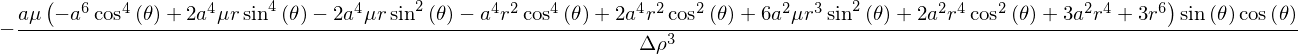

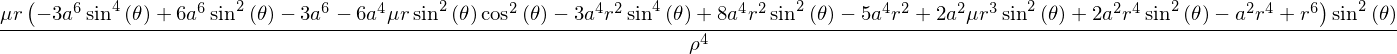

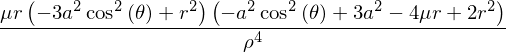

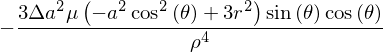

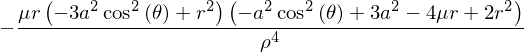

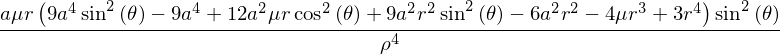

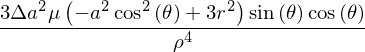

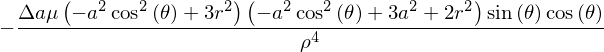

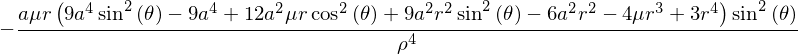

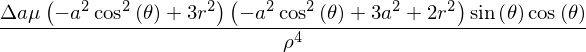

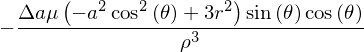

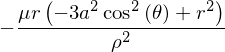

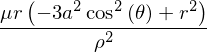

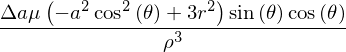

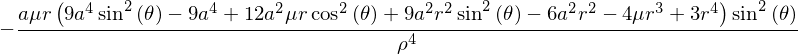

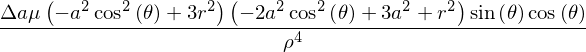

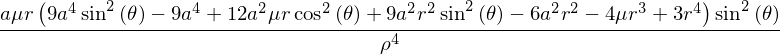

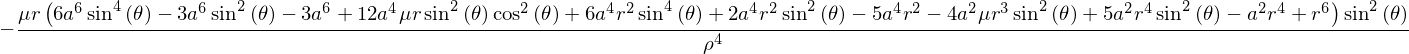

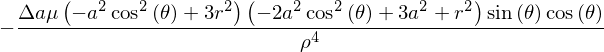

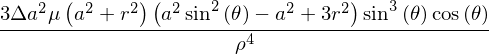

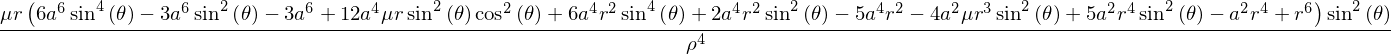

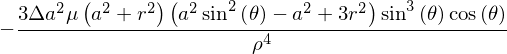

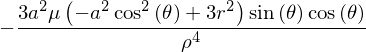

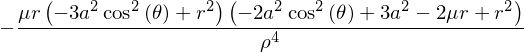

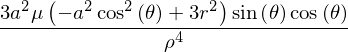

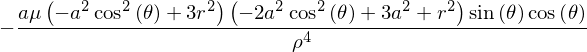

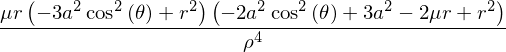

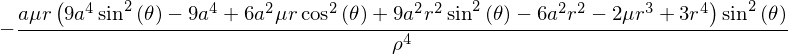

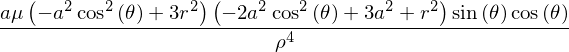

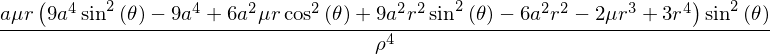

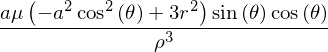

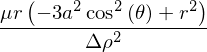

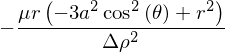

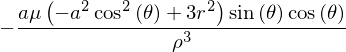

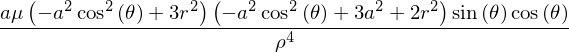

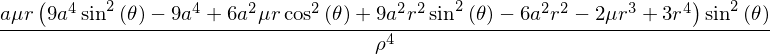

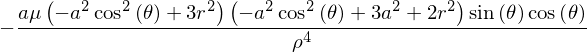

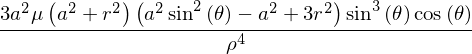

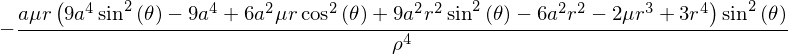

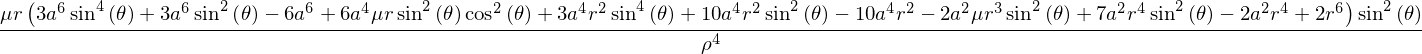

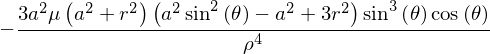

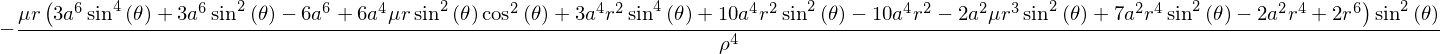

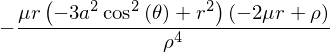

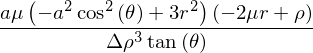

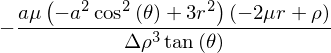

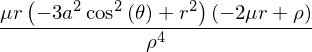

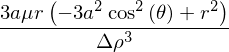

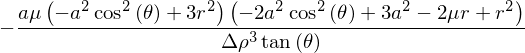

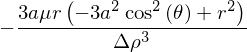

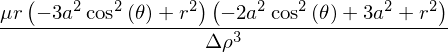

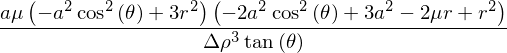

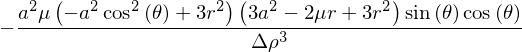

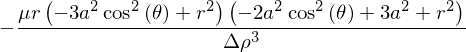

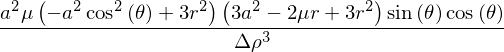

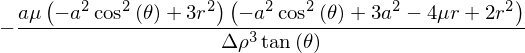

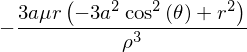

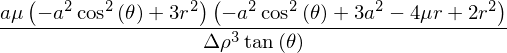

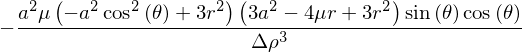

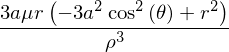

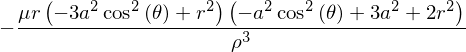

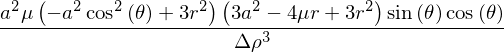

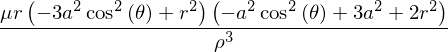

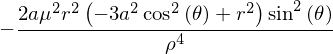

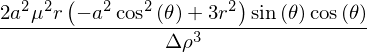

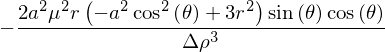

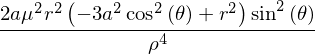

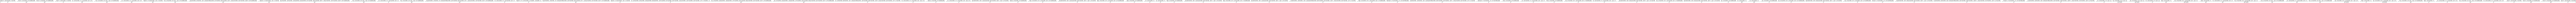

In [78]:
rim = pd.read_csv('riemann_sage.txt', sep=";", header=None)
rim_py_latex = open('riemann_real.txt', 'w')
rim.columns = ['j', 'j', 'k', 'l', "Rim"]

indices = rim[0:3]

rim_sage = rim.Rim
rim_python = [0]*rim_sage.size

for i in range(rim_sage.size):
    rim_python[i] = rim_sage[i].replace('^', '**')
    rim_python[i] = rim_python[i].replace('sin', 'sp.sin')
    rim_python[i] = rim_python[i].replace('cos', 'sp.cos')
    rim_python[i] = eval(rim_python[i])

    rim_python[i] = subsx(rim_python[i])
    #print(indices[i])
    display(rim_python[i])
#for i in range(n):
#    for j in range(n):
#        for k in range(n):
#            for l in range(n):
#                    if rim[i, j, k, l] != 0:
#                        rimxpr = subsx(rim[i, j, k, l])

#                        rimxpr = fracx(rimxpr)

                        #rim_latex.write(str(i) + str(j) + str(k) + str(l) + '\n')
                        #rim_latex.write(sp.latex(rimxpr) + '\n')
                        
                        #display([i, j, k, l], rimxpr)
                        
                       # if rim[i, j, k, l] == -rim[i, j, l, k]:
                       #     print('yes')
                        #else:
                         #   print('no')
                        
rim_latex.close()

rim_python

# Ricci

$$
R_{\beta \gamma}
$$

In [22]:
ric = gr.RicciTensor.from_metric(metric_gr)

In [ ]:
ric_latex = open('ricci_real.txt', 'w')

for i in range(n):
    for j in range(i, n):
        if ric[i, j] != 0:
                ricpr = subsx(ric[i, j])
                
                ricpr = fracx(ricpr)
                
                ric_latex.write(str(i) + str(j) + '\n')
                ric_latex.write(sp.latex(ricpr) + '\n')
                
                display([i, j], ricpr)

ric_latex.close()

# Kretschmann scalar

In [13]:
rim.config

'ulll'

In [14]:
rim_uull = rim.change_config('uull')

In [15]:
rim_uuul = rim_uull.change_config('uuul')

$$
R^{\alpha \beta \gamma \delta}
$$

In [16]:
rim_uuuu = rim_uuul.change_config('uuuu')

$$
R_{\alpha \beta \gamma \delta}
$$

In [17]:
rim_llll = rim.change_config('llll')

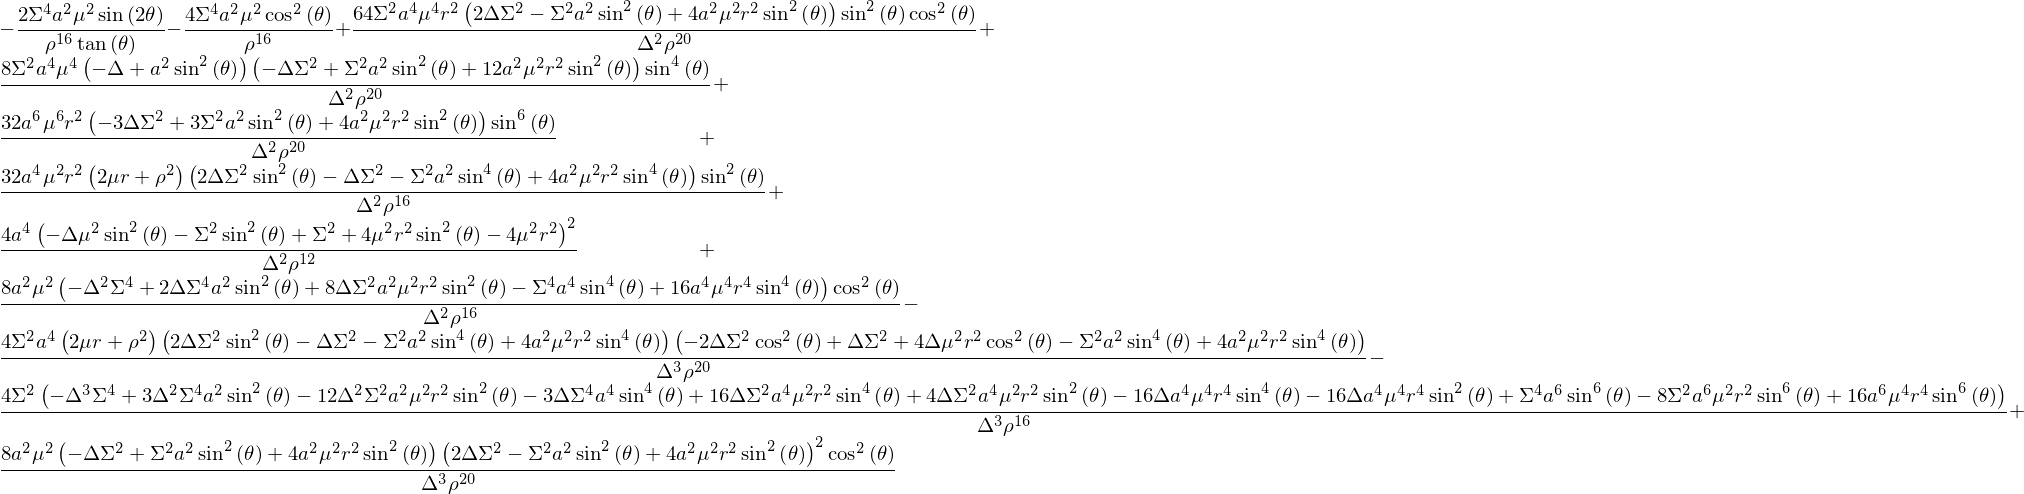

In [18]:
Kx = 0

for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                    Kx += subsx(rim_uuuu[i, j, k, l]*rim_llll[i, j, k, l])
                    #Kx = sp.collect(Kx, sp.sin(th))
                 
                    
Kx

In [19]:
K = Kx.subs(E**2, (r**2 + a**2)**2 - a**2*D*(sp.sin(th))**2)
#K = K.subs([(D, r**2 - 2*u*r + a**2), (rho**2, r**2 + a**2*(sp.cos(th))**2)])
K = sp.simplify(K)

K

KeyboardInterrupt: 

In [ ]:
#K = sp.simplify(Kx.subs(E**2, (r**2 + a**2)**2 - a**2*D*(sp.sin(th))**2))